<a href="https://colab.research.google.com/github/younesabdolmalaky/A-Dual-Channel-Approach-for-Farsi-Text-Classification-using-Transfer-Learning-Techniques/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download bittlingmayer/amazonreviews
! unzip amazonreviews.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
100% 492M/493M [00:24<00:00, 22.3MB/s]
100% 493M/493M [00:25<00:00, 20.7MB/s]
Archive:  amazonreviews.zip
  inflating: test.ft.txt.bz2         
  inflating: train.ft.txt.bz2        


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import models, layers, optimizers
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import bz2
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import re

In [3]:
from tensorflow.sparse import concat
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input , Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers, optimizers

In [4]:
import numpy as np
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import losses
from tensorflow.keras.models import Sequential
from tensorflow.sparse import reorder
from tensorflow import SparseTensor
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input , Dense
from tensorflow.keras.utils import plot_model
import pickle
from sklearn.metrics import classification_report
from tensorflow.sparse import concat
import tensorflow as tf

In [5]:
def get_labels_and_texts(file):
    labels = []
    texts = []
    for line in bz2.BZ2File(file):
        x = line.decode("utf-8")
        labels.append(int(x[9]) - 1)
        texts.append(x[10:].strip())
    return np.array(labels), texts
train_labels, train_texts = get_labels_and_texts('train.ft.txt.bz2')
test_labels, test_texts = get_labels_and_texts('test.ft.txt.bz2')


In [6]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = []
    for text in texts:
        lower = text.lower()
        no_punctuation = NON_ALPHANUM.sub(r' ', lower)
        no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
        normalized_texts.append(no_non_ascii)
    return normalized_texts
        
train_texts = normalize_texts(train_texts)
test_texts = normalize_texts(test_texts)

In [7]:
MAX_FEATURES = 12000
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train_texts)

In [8]:
train_texts = tokenizer.texts_to_sequences(train_texts)
test_texts = tokenizer.texts_to_sequences(test_texts)

In [9]:
MAX_LENGTH = max(len(train_ex) for train_ex in train_texts)
train_texts = pad_sequences(train_texts, maxlen=MAX_LENGTH)
test_texts = pad_sequences(test_texts, maxlen=MAX_LENGTH)

In [10]:
sequences = Input(shape=(255,))
embedded = layers.Embedding(MAX_FEATURES, 32)(sequences)
x = layers.Conv1D(64, 3, activation='relu')(embedded)
x = layers.BatchNormalization()(x)
x = layers.MaxPool1D(3)(x)
x = layers.Conv1D(32, 5, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool1D(5)(x)
x = layers.Conv1D(16, 5, activation='relu')(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

In [11]:
model = Model(inputs=sequences, outputs=outputs)

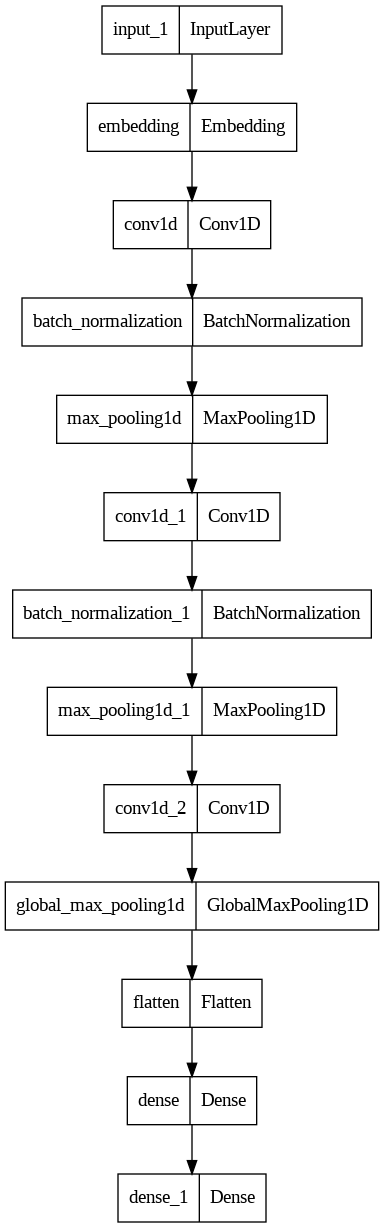

In [12]:
plot_model(model)

In [13]:
mch = callbacks.ModelCheckpoint('../models/fianl-model.h5' , monitor='accuracy' , mode ='max' , save_best_only=True)

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
batch_size =128
model.fit(train_texts,  train_labels, batch_size=batch_size, epochs=10 , callbacks=[mch] , validation_data = (test_texts , test_labels) )

Epoch 1/10
28125/28125 [==============================] - 213s 7ms/step - loss: 0.1642 - accuracy: 0.9366 - val_loss: 0.1445 - val_accuracy: 0.9460
Epoch 2/10
28125/28125 [==============================] - 198s 7ms/step - loss: 0.1345 - accuracy: 0.9501 - val_loss: 0.1367 - val_accuracy: 0.9494
Epoch 3/10
28125/28125 [==============================] - 198s 7ms/step - loss: 0.1241 - accuracy: 0.9546 - val_loss: 0.1359 - val_accuracy: 0.9496
Epoch 4/10
28125/28125 [==============================] - 200s 7ms/step - loss: 0.1167 - accuracy: 0.9577 - val_loss: 0.1376 - val_accuracy: 0.9497
Epoch 5/10
28125/28125 [==============================] - 201s 7ms/step - loss: 0.1108 - accuracy: 0.9603 - val_loss: 0.1380 - val_accuracy: 0.9494
Epoch 6/10
28125/28125 [==============================] - 199s 7ms/step - loss: 0.1060 - accuracy: 0.9624 - val_loss: 0.1409 - val_accuracy: 0.9485
Epoch 7/10
28125/28125 [==============================] - 203s 7ms/step - loss: 0.1017 - accuracy: 0.9643 - val_